In [83]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import pandas as pd
import numpy as np

from scipy.spatial.distance import cdist

from sklearn import preprocessing
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

import seaborn as sns
from windrose import WindroseAxes, WindAxes, plot_windrose

In [3]:
# 读取原始数据
rawdata_df = pd.read_excel(io=r'./风电数据集.xlsx')

In [4]:
# 数据清洗
print(np.any(rawdata_df.isna())) # 检查是否存在缺失值
rawdata_df = rawdata_df.dropna() # 删掉含缺失值的样本点

# 去除重复值（看时间戳）

False


In [5]:
# 数组类型数据
rawdata_arr = rawdata_df.iloc[:, 1:7].values

In [6]:
# 原始数据展示
# rawdata_df

In [7]:
## 原始数据统计特征分析 rd - raw data
# 均值
speed_rd_mean = np.mean(rawdata_df['WINDSPEED'])
dir_rd_mean = np.mean(rawdata_df['WINDDIRECTION'])
temper_rd_mean = np.mean(rawdata_df['TEMPERATURE'])
humi_rd_mean = np.mean(rawdata_df['HUMIDITY'])
pres_rd_mean = np.mean(rawdata_df['PRESSURE'])
power_rd_mean = np.mean(rawdata_df['WINDPOWER'])
print ("speed_rd_mean = %3.3f" %speed_rd_mean)

# 极差
speed_rd_ediff = rawdata_df['WINDSPEED'].max() - rawdata_df['WINDSPEED'].min()
dir_rd_ediff = rawdata_df['WINDDIRECTION'].max() - rawdata_df['WINDDIRECTION'].min()
temper_rd_ediff = rawdata_df['TEMPERATURE'].max() - rawdata_df['TEMPERATURE'].min()
humi_rd_ediff = rawdata_df['HUMIDITY'].max() - rawdata_df['HUMIDITY'].min()
pres_rd_ediff = rawdata_df['PRESSURE'].max() - rawdata_df['PRESSURE'].min()
power_rd_ediff = rawdata_df['WINDPOWER'].max() - rawdata_df['WINDPOWER'].min()
print ("speed_rd_ediff = %3.3f" %speed_rd_ediff)

# 标准差
speed_rd_std = np.std(rawdata_df['WINDPOWER'])
dir_rd_std = np.std(rawdata_df['WINDDIRECTION'])
temper_rd_std = np.std(rawdata_df['TEMPERATURE'])
humi_rd_std = np.std(rawdata_df['HUMIDITY'])
pres_rd_std = np.std(rawdata_df['PRESSURE'])
power_rd_std = np.std(rawdata_df['WINDPOWER'])
print ("speed_rd_std = %3.3f" %speed_rd_std)

speed_rd_mean = 5.747
speed_rd_ediff = 15.300
speed_rd_std = 16113.960


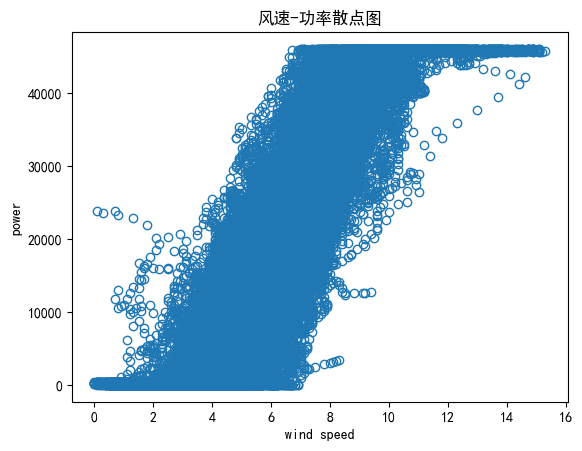

In [8]:
# 设置中文字体
plt.rcParams['font.family'] = 'SimHei' # 黑体

# 风速-功率散点图
plt.figure()
plt.xlabel("wind speed")
plt.ylabel("power")
plt.title('风速-功率散点图')
plt.plot(rawdata_df['WINDSPEED'], rawdata_df['WINDPOWER'], 'o', markerfacecolor='none')
plt.show()

# #风速频率直方图
# plt.figure()
# plt.xlabel("wind speed")
# plt.ylabel("frequency")
# plt.title('风速频率直方图')
# plt.hist(rawdata_df['WINDSPEED'])
# plt.show()

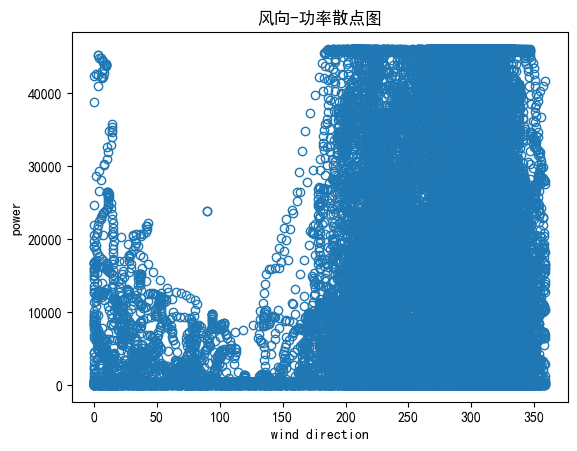

In [9]:
# 风向-功率散点图
plt.figure()
plt.xlabel("wind direction")
plt.ylabel("power")
plt.title('风向-功率散点图')
plt.plot(rawdata_df['WINDDIRECTION'], rawdata_df['WINDPOWER'], 'o', markerfacecolor='none')
plt.show()

# # 风向玫瑰图
# plt.figure() #玫瑰图
# ax = WindroseAxes.from_ax()
# ax.bar(rawdata_df['WINDDIRECTION'], rawdata_df['WINDPOWER'], normed=True, opening=0.8, cmap=cm.Set2)
# ax.set_legend()
# plt.title('风向玫瑰图')
# plt.show()

# #风向频率直方图
# plt.figure()
# plt.xlabel("wind direction")
# plt.ylabel("frequency")
# plt.title('风向频率直方图')
# plt.hist(rawdata_df['WINDDIRECTION'])
# plt.show()

In [10]:
# 数据归一化（最大最小归一化）
min_max_scaler = preprocessing.MinMaxScaler()
# 经最大最小归一化后的数据
data_mms_arr = min_max_scaler.fit_transform(rawdata_arr)
# 保持原来的标签
data_mms_df = pd.DataFrame(data_mms_arr, columns=rawdata_df.columns[1:7])

# 经预处理后的数据
data_prd_df = data_mms_df

In [11]:
# data_mms_df

In [12]:
## 经数据预处理后的数据统计特征分析 prd - pre-dealed
# 均值
speed_prd_mean = np.mean(data_prd_df['WINDSPEED'])
dir_prd_mean = np.mean(data_prd_df['WINDDIRECTION'])
temper_prd_mean = np.mean(data_prd_df['TEMPERATURE'])
humi_prd_mean = np.mean(data_prd_df['HUMIDITY'])
pres_prd_mean = np.mean(data_prd_df['PRESSURE'])
power_prd_mean = np.mean(data_prd_df['WINDPOWER'])
print ("speed_prd_mean = %3.3f" %speed_prd_mean)

# 极差
speed_prd_ediff = data_prd_df['WINDSPEED'].max() - data_prd_df['WINDSPEED'].min()
dir_prd_ediff = data_prd_df['WINDDIRECTION'].max() - data_prd_df['WINDDIRECTION'].min()
temper_prd_ediff = data_prd_df['TEMPERATURE'].max() - data_prd_df['TEMPERATURE'].min()
humi_prd_ediff = data_prd_df['HUMIDITY'].max() - data_prd_df['HUMIDITY'].min()
pres_prd_ediff = data_prd_df['PRESSURE'].max() - data_prd_df['PRESSURE'].min()
power_prd_ediff = data_prd_df['WINDPOWER'].max() - data_prd_df['WINDPOWER'].min()
print ("speed_prd_ediff = %3.3f" %speed_prd_ediff)

# 标准差
speed_prd_std = np.std(data_prd_df['WINDPOWER'])
dir_prd_std = np.std(data_prd_df['WINDDIRECTION'])
temper_prd_std = np.std(data_prd_df['TEMPERATURE'])
humi_prd_std = np.std(data_prd_df['HUMIDITY'])
pres_prd_std = np.std(data_prd_df['PRESSURE'])
power_prd_std = np.std(data_prd_df['WINDPOWER'])
print ("speed_prd_std = %3.3f" %speed_prd_std)

speed_prd_mean = 0.376
speed_prd_ediff = 1.000
speed_prd_std = 0.350


In [13]:
# ## 经预处理后数据的可视化
# # 风速-功率散点图
# plt.figure()
# plt.xlabel("wind speed")
# plt.ylabel("power")
# plt.title('风速-功率散点图')
# plt.plot(data_prd_df['WINDSPEED'], data_prd_df['WINDPOWER'], 'o', markerfacecolor='none')
# plt.show()

# #风速频率直方图
# plt.figure()
# plt.xlabel("wind speed")
# plt.ylabel("frequency")
# plt.title('风速频率直方图')
# plt.hist(data_prd_df['WINDSPEED'])
# plt.show()

# # 风向-功率散点图
# plt.figure()
# plt.xlabel("wind direction")
# plt.ylabel("power")
# plt.title('风向-功率散点图')
# plt.plot(data_prd_df['WINDDIRECTION'], data_prd_df['WINDPOWER'], 'o', markerfacecolor='none')
# plt.show()

# # 风向玫瑰图
# plt.figure() #玫瑰图
# ax = WindroseAxes.from_ax()
# ax.bar(data_prd_df['WINDDIRECTION'], data_prd_df['WINDPOWER'], normed=True, opening=0.8, cmap=cm.Set2)
# ax.set_legend()
# plt.title('风向玫瑰图')
# plt.show()

# #风向频率直方图
# plt.figure()
# plt.xlabel("wind direction")
# plt.ylabel("frequency")
# plt.title('风向频率直方图')
# plt.hist(data_prd_df['WINDDIRECTION'])
# plt.show()

 0    39325
-1      114
Name: count, dtype: int64


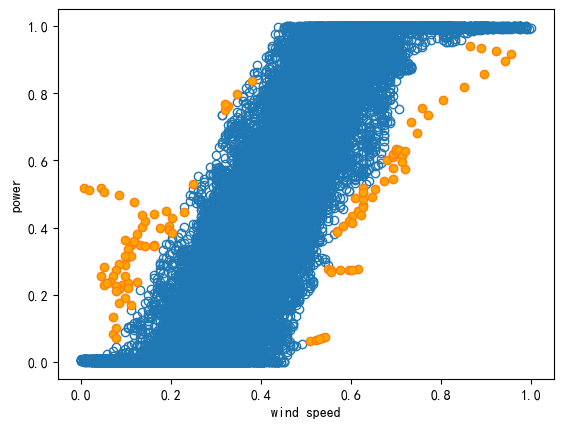

In [14]:
## 针对散点图聚类去除噪声 DBSCAN聚类方法
# 风速-功率数据
speed_power_df = data_prd_df.iloc[:, [0, 5]]

dbscan_sp = DBSCAN(eps=0.03, min_samples=20)  ##领域半径  ##成为核心对象的在领域半径内的最少点数
dbscan_sp.fit_predict(speed_power_df)

#统计每一类的数量
# count = pd.value_counts(dbscan_sp.labels_, sort=True) # 旧式用法
counts = pd.Series(dbscan_sp.labels_).value_counts()
print(counts)

# 将不同类别的点分割开
class_spe_a = speed_power_df.iloc[dbscan_sp.labels_==0]
class_spe_b = speed_power_df.iloc[dbscan_sp.labels_!=0]
# print(class_a.shape)
# print(class_b.shape)

# 聚类效果可视化
plt.figure()
plt.xlabel("wind speed")
plt.ylabel("power")
plt.plot(class_spe_a.iloc[:,0], class_spe_a.iloc[:,1], 'o', markerfacecolor='none')
plt.plot(class_spe_b.iloc[:,0], class_spe_b.iloc[:,1], 'o', markerfacecolor='orange')
plt.show()

 0    39149
-1      216
 1       43
 2       31
Name: count, dtype: int64


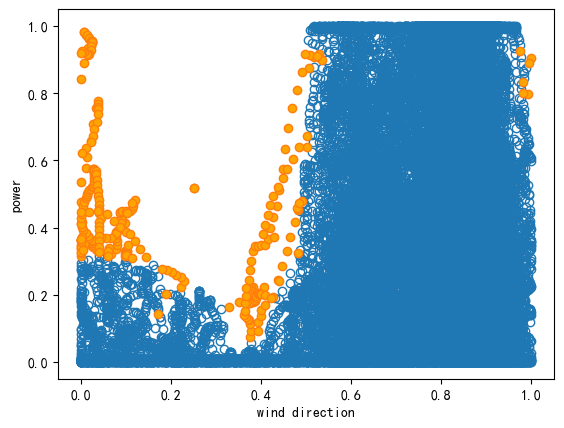

In [15]:
# 风向-功率数据
dir_power_df = data_prd_df.iloc[:, [1, 5]]

dbscan_dp = DBSCAN(eps=0.03, min_samples=20)  ##领域半径  ##成为核心对象的在领域半径内的最少点数
dbscan_dp.fit_predict(dir_power_df)

# 统计每一类的数量
counts = pd.Series(dbscan_dp.labels_).value_counts() 
print(counts)

# 将不同类别的点分割开
class_dir_a = dir_power_df.iloc[dbscan_dp.labels_==0]
class_dir_b = dir_power_df.iloc[dbscan_dp.labels_!=0]
# print(class_a.shape)
# print(class_b.shape)

# 聚类效果可视化
plt.figure()
plt.xlabel("wind direction")
plt.ylabel("power")
plt.plot(class_dir_a.iloc[:,0], class_dir_a.iloc[:,1], 'o', markerfacecolor='none')
plt.plot(class_dir_b.iloc[:,0], class_dir_b.iloc[:,1], 'o', markerfacecolor='orange')
plt.show()

 0    39198
-1      113
 2       55
 3       42
 1       31
Name: count, dtype: int64


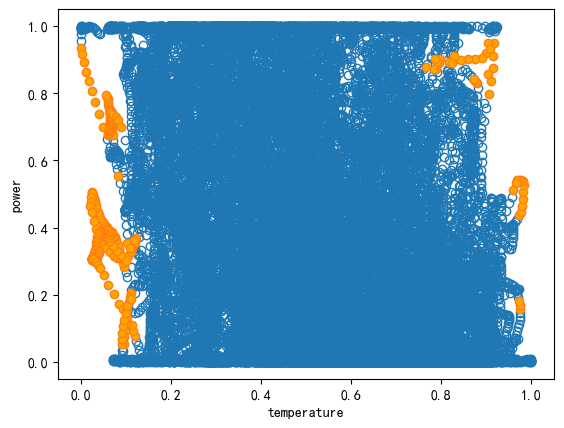

In [16]:
# 温度-功率数据
temper_power_df = data_prd_df.iloc[:, [2, 5]]

dbscan_tp = DBSCAN(eps=0.03, min_samples=20)  ##领域半径  ##成为核心对象的在领域半径内的最少点数
dbscan_tp.fit_predict(temper_power_df)

# 统计每一类的数量
counts = pd.Series(dbscan_tp.labels_).value_counts() 
print(counts)

# 将不同类别的点分割开
class_tem_a = temper_power_df.iloc[dbscan_tp.labels_==0]
class_tem_b = temper_power_df.iloc[dbscan_tp.labels_!=0]
# print(class_a.shape)
# print(class_b.shape)

# 聚类效果可视化
plt.figure()
plt.xlabel("temperature")
plt.ylabel("power")
plt.plot(class_tem_a.iloc[:,0], class_tem_a.iloc[:,1], 'o', markerfacecolor='none')
plt.plot(class_tem_b.iloc[:,0], class_tem_b.iloc[:,1], 'o', markerfacecolor='orange')
plt.show()

 0    39051
-1      163
 1      124
 3       30
 2       27
 4       27
 5       17
Name: count, dtype: int64


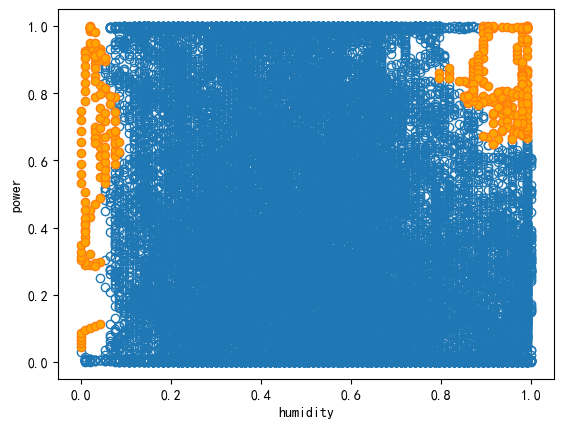

In [17]:
# 湿度-功率数据
humi_power_df = data_prd_df.iloc[:, [3, 5]]

dbscan_hp = DBSCAN(eps=0.03, min_samples=20)  ##领域半径  ##成为核心对象的在领域半径内的最少点数
dbscan_hp.fit_predict(humi_power_df)

# 统计每一类的数量
counts = pd.Series(dbscan_hp.labels_).value_counts() 
print(counts)

# 将不同类别的点分割开
class_humi_a = humi_power_df.iloc[dbscan_hp.labels_==0]
class_humi_b = humi_power_df.iloc[dbscan_hp.labels_!=0]
# print(class_a.shape)
# print(class_b.shape)

# 聚类效果可视化
plt.figure()
plt.xlabel("humidity")
plt.ylabel("power")
plt.plot(class_humi_a.iloc[:,0], class_humi_a.iloc[:,1], 'o', markerfacecolor='none')
plt.plot(class_humi_b.iloc[:,0], class_humi_b.iloc[:,1], 'o', markerfacecolor='orange')
plt.show()

 0    39035
-1      334
 1       70
Name: count, dtype: int64


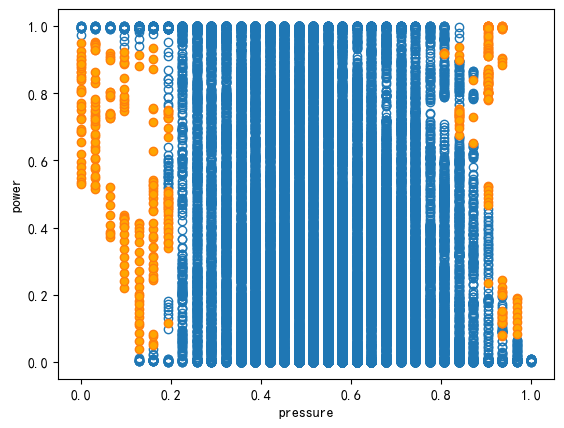

In [18]:
# 压力-功率数据
pres_power_df = data_prd_df.iloc[:, [4, 5]]

dbscan_pp = DBSCAN(eps=0.035, min_samples=35)  ##领域半径  ##成为核心对象的在领域半径内的最少点数
dbscan_pp.fit_predict(pres_power_df)

# 统计每一类的数量
counts = pd.Series(dbscan_pp.labels_).value_counts() 
print(counts)

# 将不同类别的点分割开
class_pres_a = pres_power_df.iloc[dbscan_pp.labels_ == 0]
class_pres_b = pres_power_df.iloc[dbscan_pp.labels_ != 0]
# print(class_a.shape)
# print(class_b.shape)

# 聚类效果可视化
plt.figure()
plt.xlabel("pressure")
plt.ylabel("power")
plt.plot(class_pres_a.iloc[:,0], class_pres_a.iloc[:,1], 'o', markerfacecolor='none')
plt.plot(class_pres_b.iloc[:,0], class_pres_b.iloc[:,1], 'o', markerfacecolor='orange')
plt.show()

In [19]:
# 剔除所有离群点的数据集
data_dno_df = data_prd_df.iloc[~((dbscan_sp.labels_ != 0) +
                                 (dbscan_dp.labels_ != 0) +
                                 (dbscan_tp.labels_ != 0) +
                                 (dbscan_hp.labels_ != 0) +
                                 (dbscan_pp.labels_ != 0))]

In [20]:
print('使用DBSCAN算法共去除%d个离群点' % (rawdata_df.shape[0] - data_dno_df.shape[0]))

# # 查看该数据集的散点图以验证去噪效果
# plt.figure()
# plt.ylabel("power")
# plt.plot(data_dno_df.iloc[:,4], data_dno_df.iloc[:,5], 'o', markerfacecolor='none')
# plt.show()

使用DBSCAN算法共去除1392个离群点


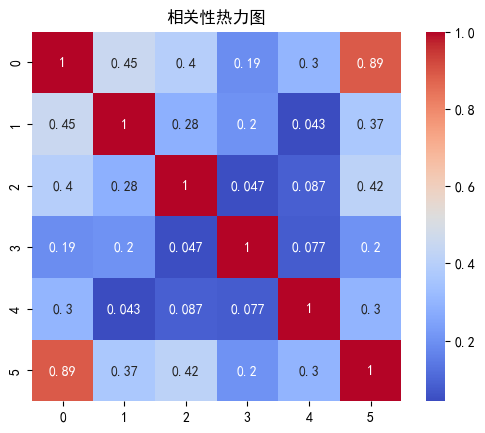

In [27]:
# 特征与功率之间的相关性热力图
corr_matrix = np.corrcoef(data_dno_df.values.T)
corr_matrix = np.abs(corr_matrix)

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("相关性热力图")
plt.show()

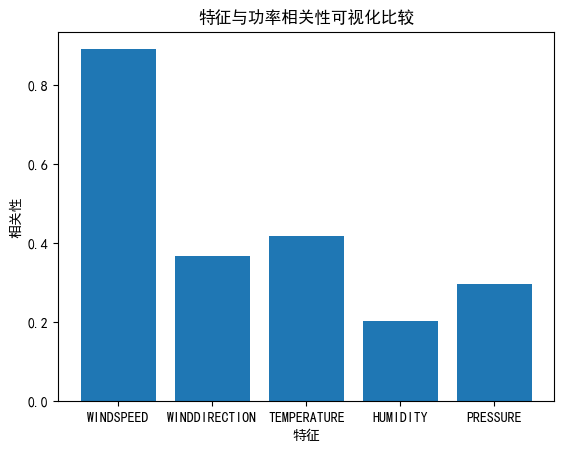

In [28]:
# 特征与功率相关性可视化比较
plt.figure()
plt.xlabel("特征")
plt.ylabel("相关性")
plt.title('特征与功率相关性可视化比较')
plt.bar(data_dno_df.columns[0:5], corr_matrix[0:5, 5])
plt.show()

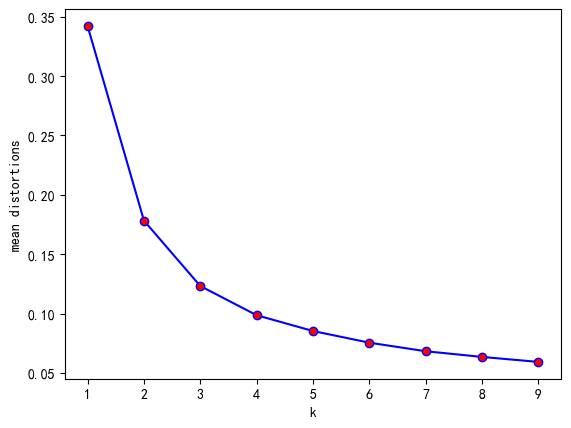

1    18009
2    11184
0     8854
Name: count, dtype: int64


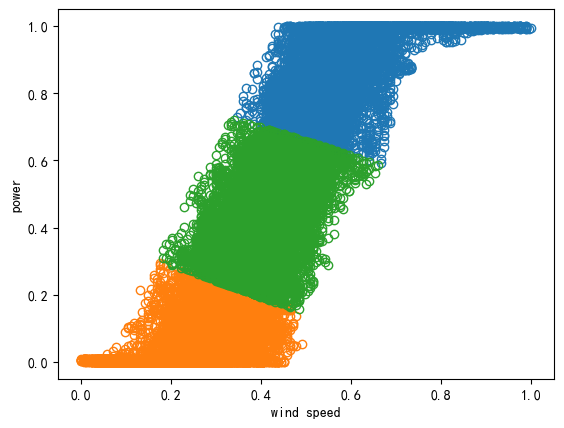

In [51]:
## K-means聚类
# 风速-功率
spe_pow_dno = data_dno_df.iloc[:, [0, 5]]

mean_dis = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(spe_pow_dno)
    # 计算平均距离
    mean_dis.append(sum(np.min(cdist(df_new, kmeans.cluster_centers_, 'euclidean'), axis=1)) / spe_pow_dno.shape[0])
    
# 肘部法判断最佳聚类个数
plt.figure()
plt.plot(range(1, 10), mean_dis, 'bo-', mfc='r')
plt.xlabel('k')
plt.ylabel('mean distortions')
plt.show()

# 最优聚类簇数为3
kmeans_spe = KMeans(n_clusters = 3).fit(spe_pow_dno)
#统计每一类的数量
counts = pd.Series(kmeans_spe.labels_).value_counts()
print(counts)

# 将不同类别的点分割开
kmeans_spe_a = spe_pow_dno.iloc[kmeans_spe.labels_ == 0]
kmeans_spe_b = spe_pow_dno.iloc[kmeans_spe.labels_ == 1]
kmeans_spe_c = spe_pow_dno.iloc[kmeans_spe.labels_ == 2]
        
plt.figure()
plt.xlabel("wind speed")
plt.ylabel("power")
plt.plot(kmeans_spe_a.iloc[:, 0], kmeans_spe_a.iloc[:, 1], 'o', markerfacecolor='none')
plt.plot(kmeans_spe_b.iloc[:, 0], kmeans_spe_b.iloc[:, 1], 'o', markerfacecolor='none')
plt.plot(kmeans_spe_c.iloc[:, 0], kmeans_spe_c.iloc[:, 1], 'o', markerfacecolor='none')
plt.show()

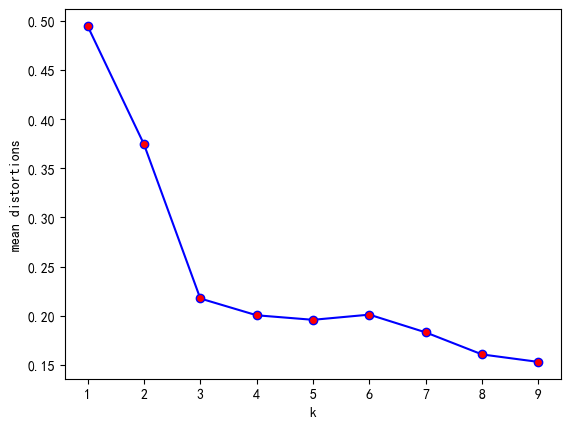

2    20099
1    12536
0     5412
Name: count, dtype: int64


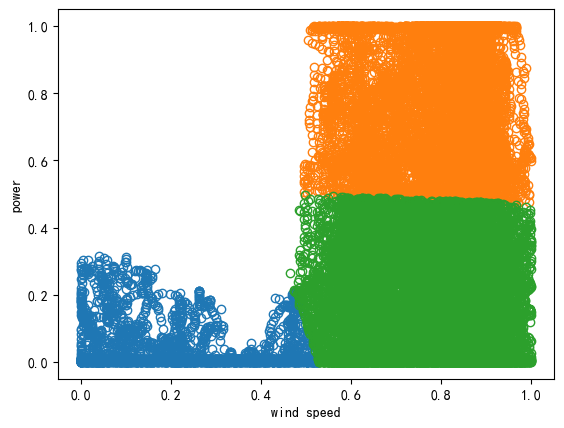

In [52]:
# 风向-功率
dir_pow_dno = data_dno_df.iloc[:, [1, 5]]

mean_dis = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dir_pow_dno)
    # 计算平均距离
    mean_dis.append(sum(np.min(cdist(df_new, kmeans.cluster_centers_, 'euclidean'), axis=1)) / dir_pow_dno.shape[0])
    
# 肘部法判断最佳聚类个数
plt.figure()
plt.plot(range(1, 10), mean_dis, 'bo-', mfc='r')
plt.xlabel('k')
plt.ylabel('mean distortions')
plt.show()

# 最优聚类簇数为3
kmeans_dir = KMeans(n_clusters = 3).fit(dir_pow_dno)
#统计每一类的数量
counts = pd.Series(kmeans_dir.labels_).value_counts()
print(counts)

# 将不同类别的点分割开
kmeans_dir_a = dir_pow_dno.iloc[kmeans_dir.labels_ == 0]
kmeans_dir_b = dir_pow_dno.iloc[kmeans_dir.labels_ == 1]
kmeans_dir_c = dir_pow_dno.iloc[kmeans_dir.labels_ == 2]
        
plt.figure()
plt.xlabel("wind speed")
plt.ylabel("power")
plt.plot(kmeans_dir_a.iloc[:, 0], kmeans_dir_a.iloc[:, 1], 'o', markerfacecolor='none')
plt.plot(kmeans_dir_b.iloc[:, 0], kmeans_dir_b.iloc[:, 1], 'o', markerfacecolor='none')
plt.plot(kmeans_dir_c.iloc[:, 0], kmeans_dir_c.iloc[:, 1], 'o', markerfacecolor='none')
plt.show()

In [77]:
## 预测建模
# 用于训练的数据集 风速 风向 功率
dataset = data_dno_df.values[:, [0,1,5]]
# 样本总数
sample_num = dataset.shape[0]
sample_divnum = round(sample_num * 0.7)
# 打乱数据集
np.random.permutation(sample_num)
# 训练集/测试集划分
train_set = dataset[0:sample_divnum, :]
test_set = dataset[sample_divnum:, :]
# 预测数据/标签
train_X = train_set[:, 0:2]
train_y = train_set[:, 2]
test_X = test_set[:, 0:2]
test_y = test_set[:, 2]

In [ ]:
# SVR模型
# 初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,          #kenel 核函数类型  CV 交叉验证折数
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],       ##C 错误项的惩罚因子
                               "gamma": np.logspace(-2, 2, 5)})  ##gamma 核函数的系数
# 训练
svr.fit(train_X, train_y)

# 测试
y1_svr = svr.predict(test_X)  ##预测结果
print(y1_svr.shape)